In [178]:
import pickle
import seq_utils
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import numpy as np
from sklearn import preprocessing


# create a custom colourmap for use throughout
colors = ["#5e8fb4", "#FFFFFF", "#e6b4b0"]
n_bins = 500  # Discretizes the interpolation into bins
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors, N=n_bins)


def load_dataframe(inputfile):

    # with open(snakemake.input.embedding_df, "rb") as input_file:
    #     embedding_df = pickle.load(input_file)

    # rb is read bytes
    # this loads it into a pandas df
    with open(inputfile, "rb") as input_file:
        embedding_df = pickle.load(input_file)

    embedding_df['Clade'] = embedding_df['info'].apply(tag_node)

    return embedding_df


def tag_node(info):
    with open('../data/NR1_ids.txt', 'r') as file:
        nr1_names = set(line.strip() for line in file)

    with open('../data/NR4_ids.txt', 'r') as file:
        nr4_names = set(line.strip() for line in file)

    if info in nr1_names:
        return 'NR1'
    elif info in nr4_names:
        return 'NR4'
    else:
        return 'Other'

In [179]:
embeddings_df = load_dataframe('../../familyprediction/Nuclear_Receptor_Notebooks/embdding_df.csv')


In [180]:
count1 = embeddings_df['Clade'].value_counts()['NR1']
count2 = embeddings_df['Clade'].value_counts()['NR4']

print(count1, count2)

6641 1123


In [181]:
df = embeddings_df.drop(columns=['info', 'sequence', 'model_name', 
                                 'protbert_max_embedding', 'protbert_cls_embedding', 
                                 'protbert_weighted_embedding'])
df


,protbert_mean_embedding,Clade
0,"[-0.17380047, 0.037478294, 0.049007155, -0.013...",Other
1,"[-0.17380047, 0.037478294, 0.049007155, -0.013...",Other
2,"[-0.17380047, 0.037478294, 0.049007155, -0.013...",Other
3,"[-0.17028484, 0.036823433, 0.049609266, -0.010...",Other
4,"[-0.1697389, 0.035590477, 0.050194185, -0.0116...",Other
...,...,...
16238,"[-0.18256481, 0.039018974, 0.05641956, -0.0044...",Other
16239,"[-0.1933781, 0.04382862, 0.05231588, 0.0063843...",Other
16240,"[-0.19043376, 0.043450236, 0.052643806, 0.0075...",Other
16241,"[-0.1872423, 0.03446747, 0.04594444, -0.022317...",Other


In [182]:
# df2 = df.join(pd.DataFrame(df.pop('protbert_mean_embedding').tolist(), index=df.index))
df = df.join(pd.DataFrame(df.pop('protbert_mean_embedding').tolist(), index=df.index))
df2 = df.copy(deep=True)

label_encoder = preprocessing.LabelEncoder()
df.Clade = label_encoder.fit_transform(df.Clade)
df_shuffle = df.sample(frac=1, random_state=10)

df = df_shuffle

In [183]:
df

,Clade,0,1,2,3,4,5,6,7,8,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
6787,0,-0.240215,0.051786,0.035342,-0.020287,-0.103623,-0.031417,0.010550,-0.037031,-0.022281,...,0.069801,0.019308,-0.011226,-0.074755,0.091291,0.058127,0.009020,0.042391,0.005436,0.076387
3398,0,-0.168082,-0.002079,0.050323,-0.021689,-0.092351,-0.020569,-0.003472,-0.014324,-0.029609,...,0.061746,-0.042230,-0.017961,-0.068658,0.040463,0.060899,-0.038114,0.014235,-0.058249,0.057056
14709,2,-0.219811,0.013117,0.075464,-0.011323,-0.109323,-0.009769,0.042594,0.008541,-0.037368,...,0.098864,-0.025995,-0.001154,-0.096089,0.067747,0.053926,-0.013208,0.018938,-0.037077,0.049111
8258,0,-0.180042,-0.005266,0.038749,-0.031084,-0.102290,-0.007753,0.012792,-0.078068,-0.005552,...,0.073021,0.028733,-0.025734,-0.058028,0.076143,0.073362,-0.000236,0.032781,0.000854,0.037213
3861,0,-0.173730,0.011366,0.055419,-0.017035,-0.089763,-0.016012,-0.004832,-0.020600,-0.028121,...,0.055263,-0.035494,-0.022774,-0.071667,0.059301,0.055509,-0.033841,0.021812,-0.052939,0.065289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11633,2,-0.226503,0.027043,0.053828,0.012866,-0.064317,-0.018509,0.003025,-0.019726,0.005885,...,0.037844,0.004971,-0.018830,-0.086222,0.089020,0.052988,-0.019520,0.051890,-0.019528,0.074411
1344,2,-0.200134,0.031186,0.064518,0.013129,-0.075807,-0.006855,0.031299,0.001835,-0.017048,...,0.050878,-0.027665,-0.018520,-0.081226,0.063026,0.061575,-0.029806,0.021141,-0.024976,0.069040
12815,2,-0.146651,-0.028378,0.041616,-0.033803,-0.096357,0.002016,0.019963,-0.022676,-0.034177,...,0.074821,-0.013393,-0.006827,-0.062582,0.071265,0.084305,-0.003669,0.027093,-0.025422,0.018893
7293,0,-0.216265,0.058909,0.071733,-0.043773,-0.094310,-0.007505,0.012055,-0.022312,-0.024167,...,0.045029,0.015092,0.006336,-0.075562,0.056772,0.065878,0.008956,0.028817,-0.014178,0.082822


In [184]:
df2

,Clade,0,1,2,3,4,5,6,7,8,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,Other,-0.173800,0.037478,0.049007,-0.013297,-0.084784,0.001687,0.011727,-0.000223,-0.002840,...,0.058941,-0.011272,-0.018396,-0.075550,0.084193,0.074452,-0.016646,0.056901,-0.037596,0.061610
1,Other,-0.173800,0.037478,0.049007,-0.013297,-0.084784,0.001687,0.011727,-0.000223,-0.002840,...,0.058941,-0.011272,-0.018396,-0.075550,0.084193,0.074452,-0.016646,0.056901,-0.037596,0.061610
2,Other,-0.173800,0.037478,0.049007,-0.013297,-0.084784,0.001687,0.011727,-0.000223,-0.002840,...,0.058941,-0.011272,-0.018396,-0.075550,0.084193,0.074452,-0.016646,0.056901,-0.037596,0.061610
3,Other,-0.170285,0.036823,0.049609,-0.010944,-0.084568,0.003398,0.010240,-0.001819,-0.004167,...,0.057444,-0.010237,-0.017900,-0.074568,0.080376,0.073193,-0.014704,0.056755,-0.034699,0.062007
4,Other,-0.169739,0.035590,0.050194,-0.011688,-0.083669,0.002004,0.009257,-0.000186,-0.006673,...,0.056677,-0.010533,-0.018272,-0.075185,0.080746,0.072491,-0.014412,0.055485,-0.038293,0.063228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16238,Other,-0.182565,0.039019,0.056420,-0.004498,-0.108686,0.018606,0.041081,0.019453,-0.012729,...,0.075055,-0.030415,-0.013783,-0.092490,0.091418,0.077205,-0.005232,0.051157,-0.043215,0.057772
16239,Other,-0.193378,0.043829,0.052316,0.006384,-0.101458,0.014361,0.026453,0.008075,0.000300,...,0.063356,-0.020975,-0.016150,-0.093411,0.087992,0.088619,-0.015043,0.055017,-0.026418,0.054596
16240,Other,-0.190434,0.043450,0.052644,0.007501,-0.104273,0.017991,0.028281,0.008177,0.001593,...,0.068156,-0.024194,-0.016736,-0.092652,0.086532,0.086807,-0.013593,0.053752,-0.028969,0.055418
16241,Other,-0.187242,0.034467,0.045944,-0.022318,-0.106282,0.006796,0.030626,0.004288,-0.011255,...,0.066942,-0.016270,-0.006127,-0.082325,0.099459,0.077002,-0.004491,0.062322,-0.048771,0.059536


In [185]:
# train test split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    df.loc[:, df.columns != 'Clade'], 
    df['Clade'], test_size=0.3, random_state=42)

In [186]:
# normalising
from sklearn.preprocessing import StandardScaler

# Original data
original_x = [x_train, x_test]

# Initialize scaler
scaler = StandardScaler()

# Normalized data lists
normalised_x = []

# Normalize each dataset
for x_data in original_x:
    normalised_x.append(scaler.fit_transform(x_data))

# Unpack the normalized data back into individual variables
x_train_norm, x_test_norm = normalised_x

### train the model and find best k

In [187]:
# Define the range of k values to test
k_values = [i for i in range(1, 100)]

acc = {}
acc_test = {}

from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score



for k in k_values:
    # Define the pipeline
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Step 1: Normalize the data
        ('knn', KNeighborsClassifier(n_neighbors=k))  # Step 2: kNN classifier
    ])

        # Perform cross-validation
    knn_scores = cross_val_score(pipeline, x_train, y_train, scoring='accuracy')
    acc[k] = np.mean(knn_scores)
    pipeline.fit(x_train, y_train)
    knn_y_pred = pipeline.predict(x_test)
    try:
        print(f"working on k={k}")
        acc_test[k] = accuracy_score(y_test, knn_y_pred)
    except:
        continue

working on k=1
working on k=2
working on k=3
working on k=4
working on k=5
working on k=6
working on k=7
working on k=8
working on k=9
working on k=10
working on k=11
working on k=12
working on k=13
working on k=14
working on k=15
working on k=16
working on k=17
working on k=18
working on k=19
working on k=20
working on k=21
working on k=22
working on k=23
working on k=24
working on k=25
working on k=26
working on k=27
working on k=28
working on k=29
working on k=30
working on k=31
working on k=32
working on k=33
working on k=34
working on k=35
working on k=36
working on k=37
working on k=38
working on k=39
working on k=40
working on k=41
working on k=42
working on k=43
working on k=44
working on k=45
working on k=46
working on k=47
working on k=48
working on k=49
working on k=50
working on k=51
working on k=52
working on k=53
working on k=54
working on k=55
working on k=56
working on k=57
working on k=58
working on k=59
working on k=60
working on k=61
working on k=62
working on k=63
w

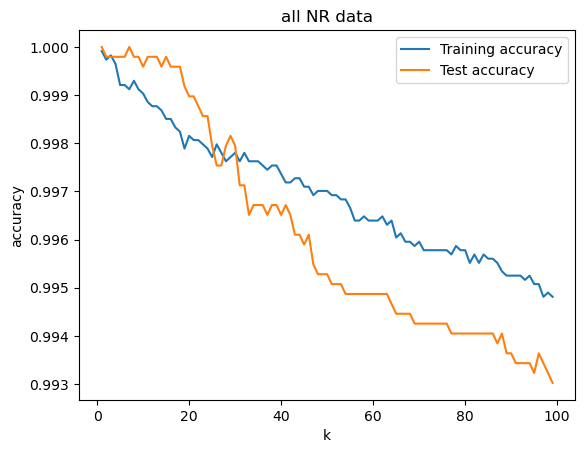

In [199]:
plt.plot(k_values, acc.values(), label='Training accuracy')
plt.plot(k_values, acc_test.values(), label='Test accuracy')
plt.xlabel('k')
plt.ylabel('accuracy')
plt.tick_params(axis='y', which='both', labelleft=True)
plt.title('all NR data')
plt.legend()
plt.show()

In [189]:
print(f"Max train accuracy: {max(acc.values())}")
knn_max = max(acc, key=acc.get)
print('k:', knn_max)
print(f"Test accuracy at k={knn_max}: {acc_test[knn_max]}")
print(f"Max test accuracy for 'More Features': {max(acc_test.values())} at k={max(acc_test, key=acc_test.get)}")
print()

Max train accuracy: 0.9999120492524186
k: 1
Test accuracy at k=1: 1.0
Max test accuracy for 'More Features': 1.0 at k=1



In [190]:
print(acc)

{1: 0.9999120492524186, 2: 0.9997361477572559, 3: 0.9998240985048372, 4: 0.9996481970096746, 5: 0.9992084432717678, 6: 0.9992084432717678, 7: 0.9991204925241866, 8: 0.9992963940193492, 9: 0.9991204925241866, 10: 0.9990325417766052, 11: 0.9988566402814424, 12: 0.998768689533861, 13: 0.998768689533861, 14: 0.9986807387862797, 15: 0.9985048372911169, 16: 0.9985048372911169, 17: 0.9983289357959542, 18: 0.9982409850483729, 19: 0.9978891820580476, 20: 0.9981530343007915, 21: 0.9980650835532101, 22: 0.9980650835532101, 23: 0.9979771328056287, 24: 0.9978891820580473, 25: 0.9977132805628848, 26: 0.9979771328056287, 27: 0.997801231310466, 28: 0.9976253298153033, 29: 0.9977132805628847, 30: 0.997801231310466, 31: 0.9976253298153033, 32: 0.997801231310466, 33: 0.9976253298153035, 34: 0.9976253298153035, 35: 0.9976253298153035, 36: 0.9975373790677221, 37: 0.9974494283201407, 38: 0.9975373790677221, 39: 0.9975373790677221, 40: 0.9973614775725593, 41: 0.9971855760773967, 42: 0.9971855760773967, 43: 0

In [191]:
print(acc_test)

{1: 1.0, 2: 0.9997947876051714, 3: 0.9997947876051714, 4: 0.9997947876051714, 5: 0.9997947876051714, 6: 0.9997947876051714, 7: 1.0, 8: 0.9997947876051714, 9: 0.9997947876051714, 10: 0.9995895752103428, 11: 0.9997947876051714, 12: 0.9997947876051714, 13: 0.9997947876051714, 14: 0.9995895752103428, 15: 0.9997947876051714, 16: 0.9995895752103428, 17: 0.9995895752103428, 18: 0.9995895752103428, 19: 0.9991791504206854, 20: 0.9989739380258568, 21: 0.9989739380258568, 22: 0.9987687256310281, 23: 0.9985635132361995, 24: 0.9985635132361995, 25: 0.9979478760517135, 26: 0.9975374512620562, 27: 0.9975374512620562, 28: 0.9979478760517135, 29: 0.9981530884465422, 30: 0.9979478760517135, 31: 0.9971270264723989, 32: 0.9971270264723989, 33: 0.9965113892879129, 34: 0.9967166016827417, 35: 0.9967166016827417, 36: 0.9967166016827417, 37: 0.9965113892879129, 38: 0.9967166016827417, 39: 0.9967166016827417, 40: 0.9965113892879129, 41: 0.9967166016827417, 42: 0.9965113892879129, 43: 0.9961009644982557, 44: 0.

### comparison with just training on 1/4 ancestors

In [194]:
subset = df2[df2['Clade'].isin(['NR1', 'NR4'])]

label_encoder = preprocessing.LabelEncoder()
subset.Clade = label_encoder.fit_transform(subset.Clade)
subset_shuffle = subset.sample(frac=1, random_state=10)
subset = subset_shuffle


# # train test split
# from sklearn.model_selection import train_test_split

x_train_sub, x_test_sub, y_train_sub, y_test_sub = train_test_split(
    subset.loc[:, subset.columns != 'Clade'], 
    subset['Clade'], test_size=0.3, random_state=42)


subset



/var/folders/xj/l_c4n_qs0817y_gr39wb6pg80000gn/T/ipykernel_21968/3287089874.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.Clade = label_encoder.fit_transform(subset.Clade)


,Clade,0,1,2,3,4,5,6,7,8,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
5359,0,-0.192391,0.013087,0.025439,-0.042939,-0.086737,-0.017665,0.002416,-0.040156,-0.033558,...,0.048011,-0.018469,-0.020986,-0.076082,0.038763,0.062677,-0.035649,0.029588,-0.025997,0.041317
3475,0,-0.164405,-0.003487,0.051665,-0.016057,-0.088031,-0.015996,-0.005150,-0.014705,-0.032570,...,0.061759,-0.043717,-0.018948,-0.071153,0.041041,0.060660,-0.039489,0.015643,-0.058107,0.058426
4652,0,-0.189253,0.037256,0.056480,-0.025264,-0.086187,-0.007379,0.003396,-0.034405,-0.015586,...,0.046315,0.010906,-0.015400,-0.050788,0.087910,0.063333,-0.003218,0.060169,-0.032223,0.095924
3892,0,-0.176305,0.012171,0.056778,-0.018622,-0.091947,-0.015427,-0.009427,-0.021098,-0.029601,...,0.062446,-0.031243,-0.022596,-0.071374,0.059300,0.056835,-0.031175,0.021098,-0.050381,0.065116
3473,0,-0.164405,-0.003487,0.051665,-0.016057,-0.088031,-0.015996,-0.005150,-0.014705,-0.032570,...,0.061759,-0.043717,-0.018948,-0.071153,0.041041,0.060660,-0.039489,0.015643,-0.058107,0.058426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6723,0,-0.238624,0.063574,0.042970,-0.020372,-0.109031,-0.023906,0.019740,-0.026636,-0.020069,...,0.075764,0.015310,-0.011548,-0.081780,0.090932,0.050278,0.003356,0.039083,-0.001752,0.076047
4626,0,-0.176999,0.015072,0.056086,-0.020444,-0.094682,-0.010470,0.006966,-0.022804,-0.012209,...,0.061320,-0.010618,-0.017880,-0.058169,0.065090,0.063476,-0.012685,0.051263,-0.040129,0.062623
7905,0,-0.198996,-0.009307,0.048407,-0.039892,-0.089566,-0.022007,-0.000068,-0.062439,-0.016306,...,0.065775,0.007906,-0.009025,-0.058929,0.078177,0.103768,0.014179,0.031743,0.002519,0.035894
10575,1,-0.212560,0.012356,0.059717,0.001432,-0.085340,-0.013800,0.009466,-0.023232,-0.008923,...,0.040086,0.004756,-0.030046,-0.056820,0.070456,0.061017,-0.010650,0.023073,-0.030853,0.075547


In [195]:

# normalising
# Original data
original_x_sub = [x_train_sub, x_test_sub]

# Initialize scaler
scaler = StandardScaler()

# Normalized data lists
normalised_x_sub = []

# Normalize each dataset
for x_data in original_x_sub:
    normalised_x_sub.append(scaler.fit_transform(x_data))

# Unpack the normalized data back into individual variables
x_train_norm_sub, x_test_norm_sub = normalised_x_sub




# Define the range of k values to test
k_values = [i for i in range(1, 100)]

acc_sub = {}
acc_test_sub = {}


for k in k_values:
    # Define the pipeline
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Step 1: Normalize the data
        ('knn', KNeighborsClassifier(n_neighbors=k))  # Step 2: kNN classifier
    ])

        # Perform cross-validation
    knn_scores_sub = cross_val_score(pipeline, x_train_sub, y_train_sub, scoring='accuracy')
    acc_sub[k] = np.mean(knn_scores_sub)
    pipeline.fit(x_train_sub, y_train_sub)
    knn_y_pred_sub = pipeline.predict(x_test_sub)
    try:
        print(f"working on k={k}")
        acc_test_sub[k] = accuracy_score(y_test_sub, knn_y_pred_sub)
    except:
        continue

working on k=1
working on k=2
working on k=3
working on k=4
working on k=5
working on k=6
working on k=7
working on k=8
working on k=9
working on k=10
working on k=11
working on k=12
working on k=13
working on k=14
working on k=15
working on k=16
working on k=17
working on k=18
working on k=19
working on k=20
working on k=21
working on k=22
working on k=23
working on k=24
working on k=25
working on k=26
working on k=27
working on k=28
working on k=29
working on k=30
working on k=31
working on k=32
working on k=33
working on k=34
working on k=35
working on k=36
working on k=37
working on k=38
working on k=39
working on k=40
working on k=41
working on k=42
working on k=43
working on k=44
working on k=45
working on k=46
working on k=47
working on k=48
working on k=49
working on k=50
working on k=51
working on k=52
working on k=53
working on k=54
working on k=55
working on k=56
working on k=57
working on k=58
working on k=59
working on k=60
working on k=61
working on k=62
working on k=63
w

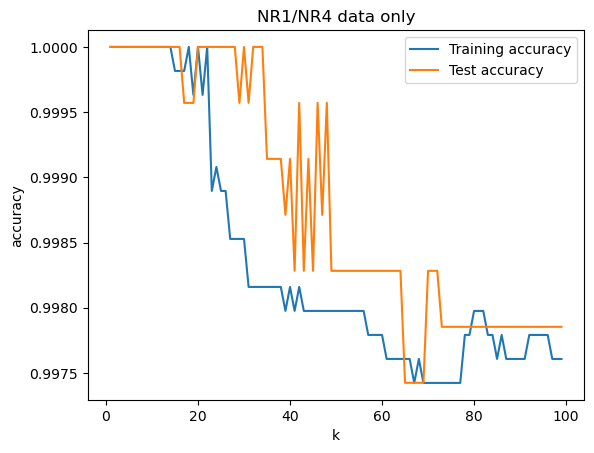

In [198]:
plt.plot(k_values, acc_sub.values(), label='Training accuracy')
plt.plot(k_values, acc_test_sub.values(), label='Test accuracy')
plt.xlabel('k')
plt.ylabel('accuracy')
plt.tick_params(axis='y', which='both', labelleft=True)
plt.title("NR1/NR4 data only")
plt.legend()
plt.show()

In [197]:
subset

,Clade,0,1,2,3,4,5,6,7,8,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
5359,0,-0.192391,0.013087,0.025439,-0.042939,-0.086737,-0.017665,0.002416,-0.040156,-0.033558,...,0.048011,-0.018469,-0.020986,-0.076082,0.038763,0.062677,-0.035649,0.029588,-0.025997,0.041317
3475,0,-0.164405,-0.003487,0.051665,-0.016057,-0.088031,-0.015996,-0.005150,-0.014705,-0.032570,...,0.061759,-0.043717,-0.018948,-0.071153,0.041041,0.060660,-0.039489,0.015643,-0.058107,0.058426
4652,0,-0.189253,0.037256,0.056480,-0.025264,-0.086187,-0.007379,0.003396,-0.034405,-0.015586,...,0.046315,0.010906,-0.015400,-0.050788,0.087910,0.063333,-0.003218,0.060169,-0.032223,0.095924
3892,0,-0.176305,0.012171,0.056778,-0.018622,-0.091947,-0.015427,-0.009427,-0.021098,-0.029601,...,0.062446,-0.031243,-0.022596,-0.071374,0.059300,0.056835,-0.031175,0.021098,-0.050381,0.065116
3473,0,-0.164405,-0.003487,0.051665,-0.016057,-0.088031,-0.015996,-0.005150,-0.014705,-0.032570,...,0.061759,-0.043717,-0.018948,-0.071153,0.041041,0.060660,-0.039489,0.015643,-0.058107,0.058426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6723,0,-0.238624,0.063574,0.042970,-0.020372,-0.109031,-0.023906,0.019740,-0.026636,-0.020069,...,0.075764,0.015310,-0.011548,-0.081780,0.090932,0.050278,0.003356,0.039083,-0.001752,0.076047
4626,0,-0.176999,0.015072,0.056086,-0.020444,-0.094682,-0.010470,0.006966,-0.022804,-0.012209,...,0.061320,-0.010618,-0.017880,-0.058169,0.065090,0.063476,-0.012685,0.051263,-0.040129,0.062623
7905,0,-0.198996,-0.009307,0.048407,-0.039892,-0.089566,-0.022007,-0.000068,-0.062439,-0.016306,...,0.065775,0.007906,-0.009025,-0.058929,0.078177,0.103768,0.014179,0.031743,0.002519,0.035894
10575,1,-0.212560,0.012356,0.059717,0.001432,-0.085340,-0.013800,0.009466,-0.023232,-0.008923,...,0.040086,0.004756,-0.030046,-0.056820,0.070456,0.061017,-0.010650,0.023073,-0.030853,0.075547
